## Import Package

In [166]:
import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import math
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

## Access Dataset

In [167]:
fname = 'Cleaned_Data.csv'
data = DataFrame(pd.read_csv(fname, sep = ','))
data.head()

,Unnamed: 0,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,...,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD,DAY,MONTH,YEAR
0,0,WBAN:00169,CHESTER AIRPORT CT US,127.1,41.384,-72.506,2014-07-31 15:55:00,FM-15,CLR:00,10.0,...,-9999,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-31,7,2014
1,1,WBAN:00169,CHESTER AIRPORT CT US,127.1,41.384,-72.506,2014-07-31 16:15:00,FM-15,CLR:00,10.0,...,-9999,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-31,7,2014
2,2,WBAN:00169,CHESTER AIRPORT CT US,127.1,41.384,-72.506,2014-07-31 16:35:00,FM-15,CLR:00,10.0,...,-9999,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-31,7,2014
3,3,WBAN:00169,CHESTER AIRPORT CT US,127.1,41.384,-72.506,2014-07-31 19:15:00,FM-15,CLR:00,10.0,...,-9999,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-31,7,2014
4,4,WBAN:00169,CHESTER AIRPORT CT US,127.1,41.384,-72.506,2014-07-31 19:35:00,FM-15,CLR:00,10.0,...,-9999,NaN,NaN,NaN,NaN,NaN,NaN,2014-07-31,7,2014


## Exploratory Data Analysis (original dataset)

### Daily tmperature

In [168]:
tdata = DataFrame(data[['HOURLYDRYBULBTEMPF', 'DAY']])
#tdata

In [169]:
tdata.columns = ['TEMPERATURE_F', 'DAY']
tdata = pd.DataFrame(tdata.groupby('DAY')['TEMPERATURE_F'].mean()).reset_index()
tdata.head()

,DAY,TEMPERATURE_F
0,2014-07-31,70.411765
1,2014-08-01,73.527778
2,2014-08-02,65.956522
3,2014-08-03,67.040000
4,2014-08-04,71.425532


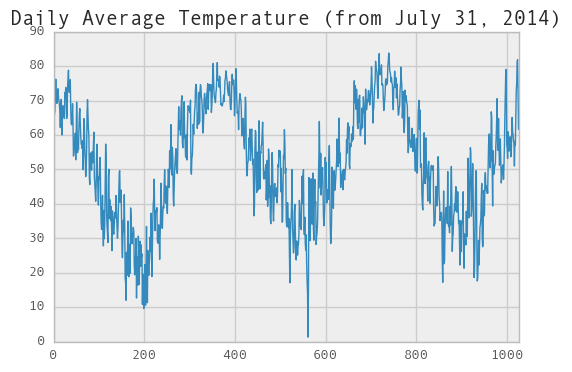

In [170]:
pd.options.display.mpl_style = 'default'
daily_temp = tdata['TEMPERATURE_F'].plot(kind = "line",
                          title = "Daily Average Temperature (from July 31, 2014)",
                          legend = False)

### Save the image

In [171]:
#fig = daily_temp.get_figure()
#fig.savefig("Daily Average Temprature.png")

### Monthly temperature comparison

In [172]:
tdata = DataFrame(data[['HOURLYDRYBULBTEMPF', 'MONTH']])
tdata.columns = ['TEMPERATURE_F', 'MONTH']
# groupby the dataset by month
tdata = pd.DataFrame(tdata.groupby('MONTH')['TEMPERATURE_F'].mean()).reset_index()
tdata

,MONTH,TEMPERATURE_F
0,1,31.695001
1,2,30.890736
2,3,37.046565
3,4,49.336000
4,5,59.246953
5,6,65.922923
6,7,73.808083
7,8,72.398336
8,9,66.621242
9,10,54.382821


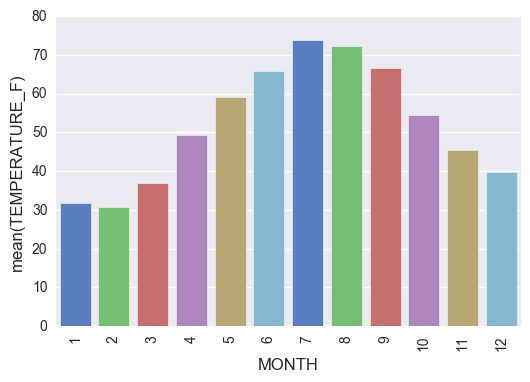

In [173]:
sns.set_style("darkgrid")
bar_plot = sns.barplot(x=tdata["MONTH"],y=tdata["TEMPERATURE_F"],
                        palette="muted",)
plt.xticks(rotation=90)
plt.show()

In [174]:
tdata = DataFrame(data[['HOURLYDRYBULBTEMPF', 'MONTH']])
tdata.head()

,HOURLYDRYBULBTEMPF,MONTH
0,77.0,7
1,77.0,7
2,75.0,7
3,72.0,7
4,70.0,7


In [175]:
td1 = tdata.loc[tdata['MONTH'] == 1]
td2 = tdata.loc[tdata['MONTH'] == 2]
td3 = tdata.loc[tdata['MONTH'] == 3]
td4 = tdata.loc[tdata['MONTH'] == 4]
td5 = tdata.loc[tdata['MONTH'] == 5]
td6 = tdata.loc[tdata['MONTH'] == 6]
td7 = tdata.loc[tdata['MONTH'] == 7]
td8 = tdata.loc[tdata['MONTH'] == 8]
td9 = tdata.loc[tdata['MONTH'] == 9]
td10 = tdata.loc[tdata['MONTH'] == 10]
td11 = tdata.loc[tdata['MONTH'] == 11]
td12 = tdata.loc[tdata['MONTH'] == 12]

td_plot = [td1['HOURLYDRYBULBTEMPF'], td2['HOURLYDRYBULBTEMPF'], td3['HOURLYDRYBULBTEMPF'], td4['HOURLYDRYBULBTEMPF'], td5['HOURLYDRYBULBTEMPF'], td6['HOURLYDRYBULBTEMPF'], td7['HOURLYDRYBULBTEMPF'], td8['HOURLYDRYBULBTEMPF'], td9['HOURLYDRYBULBTEMPF'], td10['HOURLYDRYBULBTEMPF'], td11['HOURLYDRYBULBTEMPF'], td12['HOURLYDRYBULBTEMPF']]

### Remove NaN

In [176]:
td1.fillna(0, inplace=True)
td2.fillna(0, inplace=True)
td3.fillna(0, inplace=True)
td4.fillna(0, inplace=True)
td5.fillna(0, inplace=True)
td6.fillna(0, inplace=True)
td7.fillna(0, inplace=True)
td8.fillna(0, inplace=True)
td9.fillna(0, inplace=True)
td10.fillna(0, inplace=True)
td11.fillna(0, inplace=True)
td12.fillna(0, inplace=True)

In [177]:
for value in td3['HOURLYDRYBULBTEMPF']:
    if math.isnan(value):
        print(value)

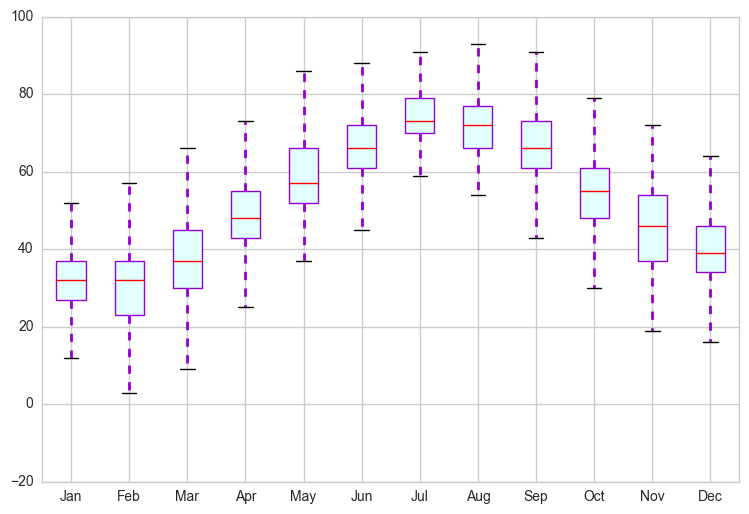

In [190]:
fig = plt.figure(2, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(td_plot, patch_artist = True)

# Change color
for box in bp['boxes']:
    box.set(color = '#9400D3', linewidth = 1)
    box.set(facecolor = '#E1FFFF')
    
for whisker in bp['whiskers']:
    whisker.set(color = '#9400D3', linewidth = 2)

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')

### Visibility comparison

In [179]:
vdata = DataFrame(data[['HOURLYVISIBILITY', 'MONTH']])
vdata.columns = ['VISIBILITY', 'MONTH']
vdata = pd.DataFrame(vdata.groupby('MONTH')['VISIBILITY'].mean()).reset_index()
vdata

,MONTH,VISIBILITY
0,1,8.901995
1,2,8.634242
2,3,8.733614
3,4,8.853326
4,5,8.774327
5,6,8.999790
6,7,9.262629
7,8,9.482047
8,9,9.215585
9,10,9.175108


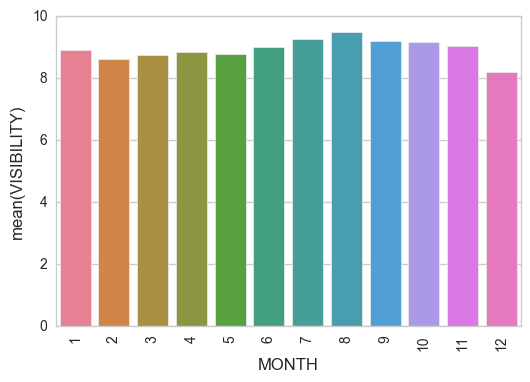

In [180]:
sns.set_style("whitegrid")
bar_plot = sns.barplot(x=vdata["MONTH"],y=vdata["VISIBILITY"],
                        palette="husl",)
plt.xticks(rotation=90)
plt.show()

In [181]:
fig = bar_plot.get_figure()
fig.savefig("Monthly Visibility Comparison.png")

### Precipitation Analysis

In [182]:
#ypdata = ypdata.loc[ypdata['YEAR'] == 2016]
pdata = DataFrame(data[['HOURLYPrecip', 'MONTH']])
pdata.columns = ['PRECIPITATION', 'MONTH']
pdata = pd.DataFrame(pdata.groupby('MONTH')['PRECIPITATION'].sum()).reset_index()
pdata

,MONTH,PRECIPITATION
0,1,191.30
1,2,123.86
2,3,104.41
3,4,10.50
4,5,0.78
5,6,22.83
6,7,12.34
7,8,27.13
8,9,28.48
9,10,38.76


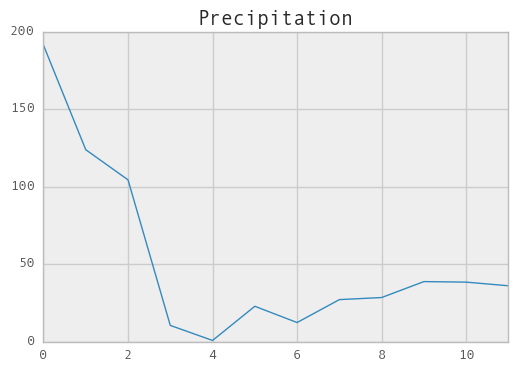

In [183]:
pd.options.display.mpl_style = 'default'
monthly_prec = pdata['PRECIPITATION'].plot(kind = "line",
                          title = "Precipitation",
                          legend = False)

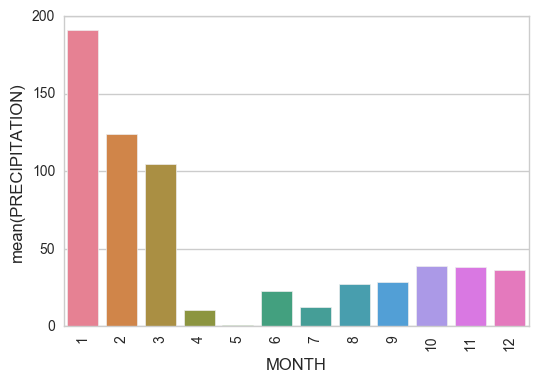

In [184]:
sns.set_style("whitegrid")
bar_plot = sns.barplot(x=pdata["MONTH"],y=pdata["PRECIPITATION"],
                        palette="husl",)
plt.xticks(rotation=90)
plt.show()

In [185]:
#fig = monthly_prec.get_figure()
#fig.savefig("Monthly Visibility Comparison.png")

### The relationship among wetbulbtemperature, drybulbtemperature, and humidity

In [188]:
data['DIFFERENCE_WD'] = data['HOURLYDRYBULBTEMPF'] - data['HOURLYWETBULBTEMPF']
#data
thdata = data
thdata = thdata.loc[(thdata['HOURLYDRYBULBTEMPF'] > 70) & (thdata['HOURLYDRYBULBTEMPF'] < 80) & (thdata['HOURLYRelativeHumidity'] > 50)]
thdata = DataFrame(thdata[['DIFFERENCE_WD', 'HOURLYRelativeHumidity', 'MONTH', 'HOURLYWindSpeed', 'HOURLYDRYBULBTEMPF']])
thdata.head()

,DIFFERENCE_WD,HOURLYRelativeHumidity,MONTH,HOURLYWindSpeed,HOURLYDRYBULBTEMPF
0,9.0,57.0,7,14.0,77.0
1,9.0,57.0,7,10.0,77.0
2,8.0,61.0,7,10.0,75.0
3,7.0,69.0,7,7.0,72.0
34,3.0,88.0,8,5.0,72.0


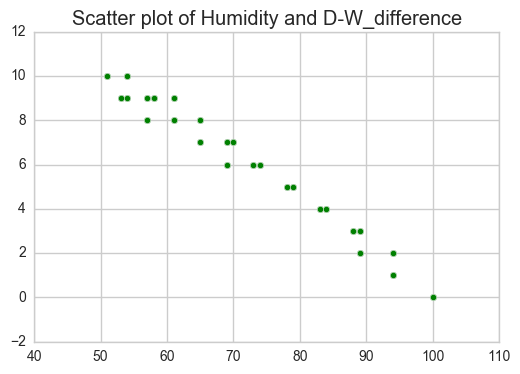

In [187]:
plt.scatter(thdata['HOURLYRelativeHumidity'], thdata['DIFFERENCE_WD'], c = 'g', alpha = 0.5)
plt.title('Scatter plot of Humidity and D-W_difference')
plt.show()